In [6]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
palette = sns.color_palette('tab10')
sns.set_palette(palette)
sns.set(context='paper', style='white', font="cmr10", font_scale=1.2)
plt.rcParams['axes.formatter.use_mathtext'] = True

# Optuna fitting

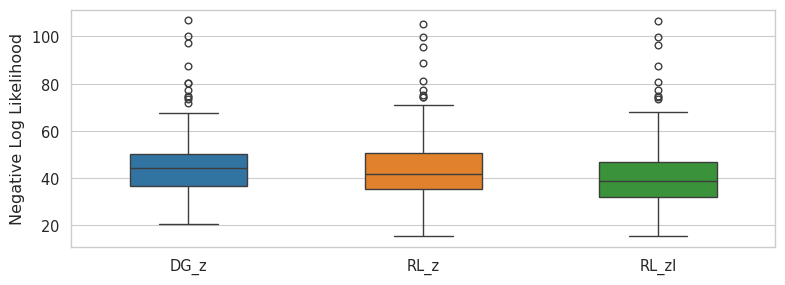

In [19]:
dg_z = pd.read_pickle("data/DG_z_jiang_feb24_performance.pkl")
rl_z = pd.read_pickle("data/RL_z_jiang_feb24_performance.pkl")
rl_zl = pd.read_pickle("data/RL_zl_jiang_feb24_performance.pkl")
combined = pd.concat([dg_z, rl_z, rl_zl], ignore_index=True)

with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,3), sharex=True, sharey='row')
    sns.boxplot(combined, x='type', y='loss', hue='type', ax=ax, palette=palette[:3], notch=False, width=0.5)
    ax.set(xlabel=None, ylabel='Negative Log Likelihood') # 'Loss\n'+
    plt.tight_layout()
    fig.savefig("plots/jiang_performance.jpg", dpi=600)

# Compare parameters

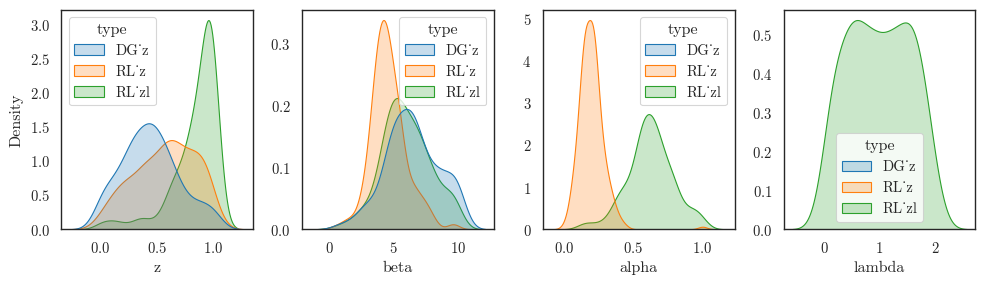

In [21]:
dg_z = pd.read_pickle("data/DG_z_jiang_feb24_params.pkl")
rl_z = pd.read_pickle("data/RL_z_jiang_feb24_params.pkl")
rl_zl = pd.read_pickle("data/RL_zl_jiang_feb24_params.pkl")
combined = pd.concat([dg_z, rl_z, rl_zl], ignore_index=True)

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10,3))
sns.kdeplot(combined, x='z', hue='type', ax=axes[0], palette=palette[:3], fill=True, common_norm=False)
sns.kdeplot(combined, x='beta', hue='type', ax=axes[1], palette=palette[:3], fill=True, common_norm=False)
sns.kdeplot(combined, x='alpha', hue='type', ax=axes[2], palette=palette[:3], fill=True, common_norm=False)
sns.kdeplot(combined, x='lambda', hue='type', ax=axes[3], palette=palette[:3], fill=True, common_norm=False)
axes[1].set(ylabel=None)
axes[2].set(ylabel=None)
axes[3].set(ylabel=None)
plt.tight_layout()